1.1.1 K-means clustering and Expectation Maximization

K-means

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# center initialization
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

# find the colsest center of each point
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

#find the center of the new cluster
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

K-means k = 2

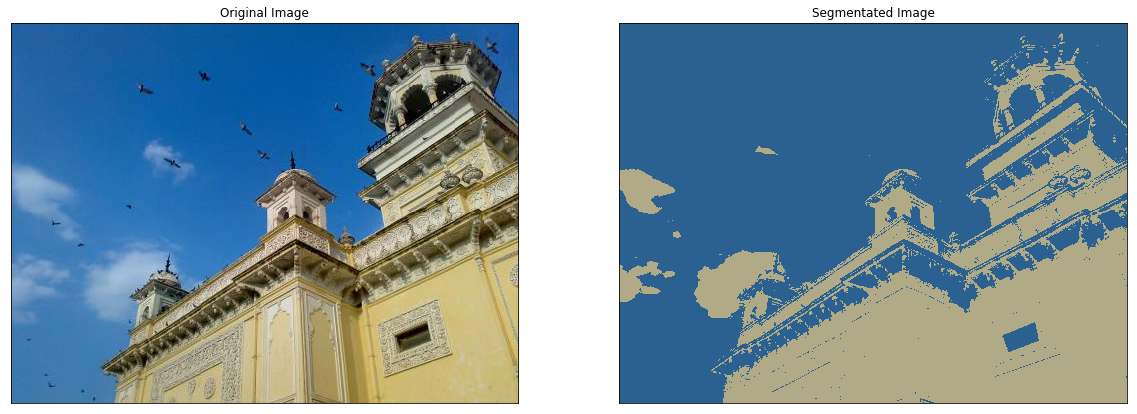

In [17]:
# read image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)

Z = img.reshape((-1,3))
Z = np.float32(Z)

# get the center of the initial cluster
c = initialize_centroids(Z, 2)

# do 10 iterations
for i in range (0, 10):
    x=closest_centroid(Z, c)
    c= move_centroids(Z, x, c)

# get the raw data
c = np.uint8(c)
segmentation = c[x.flatten()]

# reshape the raw data into img shape to display
segmentation = segmentation.reshape((img.shape))

# display the image
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

K-means k = 3 

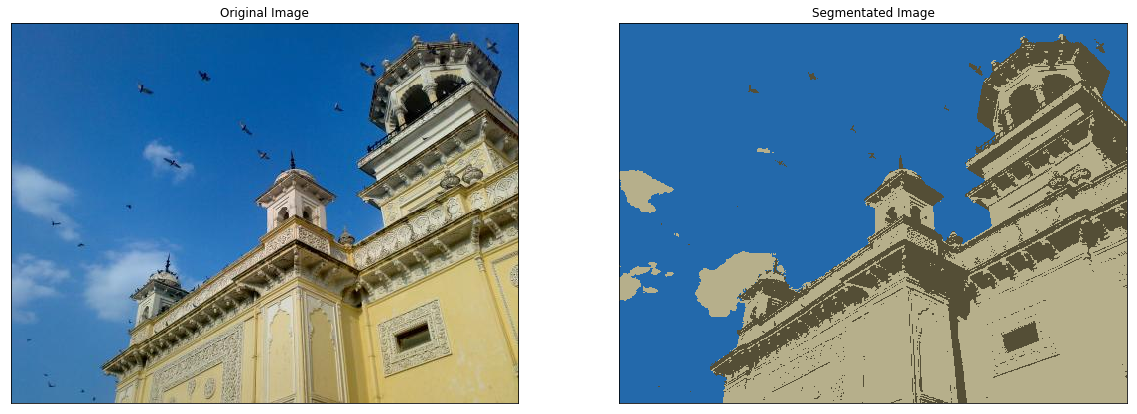

In [18]:
# read the image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
# reshape the image 
Z = img.reshape((-1,3))

Z = np.float32(Z)

# get the initialized center
c = initialize_centroids(Z, 3)
# do 10 iterations
for i in range (0, 10):
    x=closest_centroid(Z, c)
    c= move_centroids(Z, x, c)
    
# get the raw data
c = np.uint8(c)
segmentation = c[x.flatten()]

# reshape the raw data into image size
segmentation = segmentation.reshape((img.shape))

# display the image
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

1.1.2 EM method

with gaussian K = 2 

In [36]:

from scipy.stats import multivariate_normal as mvn
img_path = "home.jpg"
img = cv2.imread(img_path)
img_copy = img.copy()
height, width = img.shape[:2]

# method to find the covariance of the clusters
def find_variance(clusters, means):
    variances = []
    for i in range (0,2):
        total_sum=0
        mean = means[i]
        cluster = clusters[i]
        length = len(cluster)
        for j in range(0,length):
            q=(np.subtract(cluster[j],mean))
            w=q.reshape(3,-1)
            curr_sum=np.matmul(w,(w.T))
            total_sum=np.add(curr_sum,total_sum)
        variance = np.divide(total_sum,(length - 1))
        variances.append(variance)
    return variances

# method to find points correspoding to which group
def find_group (color, means, clusters, covariances):
    probabilities = []
    # calculate the probabilities of each input points
    for i in range (0,2):
        covariance = covariances[i]
        curr_prob = mvn.pdf(color, means[i], covariance)
        probabilities.append(curr_prob)
    weights = []
    # calculate the weights of each input points
    for i in range(0,2):
        weights = [x / (height*width) for x in probabilities]
        weights.append(weights)
    max_expect = 0
    
    # calculate the expectation of each input points and findout which group 
    for i in range (0,2):
        curr_expect = np.multiply(weights[i],probabilities[i])/np.add(np.multiply(weights[0],probabilities[0])
            ,np.multiply(weights[1],probabilities[1]))
        if curr_expect > max_expect:
            max_expect = curr_expect
            to_group = i + 1
    return to_group

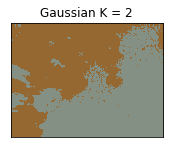

In [38]:

new_clusters1_pos = []
new_clusters2_pos = []

new_clusters1_color = []
new_clusters2_color = []
# get the array of the image 
array = np.array(img)
array_copy = array.copy()
array_copy1= array.copy()
# reshape the image into [RGB] [RGB]
array_copy = array_copy.transpose(0,1,2).reshape(-1,3)
np.random.shuffle(array_copy1)

init_cluster_size = int(array_copy.shape[0]/2)

# initialize 2 gaussian clusters
cluster1 = array_copy[init_cluster_size*0:init_cluster_size*1]
cluster2 = array_copy[init_cluster_size*1:init_cluster_size*2]
clusters = [cluster1, cluster2]

# calculate the mean of the clusters
meanc11 = int(np.mean(cluster1[:,0]))
meanc12 = int(np.mean(cluster1[:,1]))
meanc13 = int(np.mean(cluster1[:,2]))
meanc21 = int(np.mean(cluster2[:,0]))
meanc22 = int(np.mean(cluster2[:,1]))
meanc23 = int(np.mean(cluster2[:,2]))
meanc1 = [meanc11,meanc12,meanc13]
meanc2 = [meanc21,meanc22,meanc23]
means=[meanc1,meanc2]

# do 10 iterations
for i in range(0,10):
    covariances = find_variance(clusters, means)
    for row in range(0, height):
            for col in range(0, width):
                color = img[row, col]
                pos=(row,col)
                group_no = find_group(color, means, clusters, covariances)
                # assign groups to each points
                if group_no == 1:
                    new_clusters1_color.append(color)
                    new_clusters1_pos.append(pos)
                else:
                    new_clusters2_color.append(color)
                    new_clusters2_pos.append(pos)
    # get the new clusters
    clusters1 = new_clusters1_color
    clusters2 = new_clusters2_color
    clusters = [clusters1,clusters2]
    
    #calculate the new means
    meanc11 = int(np.mean(cluster1[:,0]))
    meanc12 = int(np.mean(cluster1[:,1]))
    meanc13 = int(np.mean(cluster1[:,2]))
    meanc21 = int(np.mean(cluster2[:,0]))
    meanc22 = int(np.mean(cluster2[:,1]))
    meanc23 = int(np.mean(cluster2[:,2]))
    meanc1 = [meanc11,meanc12,meanc13]
    meanc2 = [meanc21,meanc22,meanc23]
    means=[meanc1,meanc2]
    
# replace the position with the mean of the clusters
for x in range(0, len(new_clusters1_pos)):
    img_copy[new_clusters1_pos[x][0], new_clusters1_pos[x][1]] = means[0]
for x in range(0, len(new_clusters2_pos)):
    img_copy[new_clusters2_pos[x][0], new_clusters2_pos[x][1]] = means[1]

plt.subplot(122), plt.imshow(img_copy)
plt.title("Gaussian K = 2"), plt.xticks([]), plt.yticks([])
plt.show()

with gaussian K = 3 

In [24]:
# method to find the covariance of the clusters
def find_variance(clusters, means):
    variances = []
    for i in range (0,3):
        total_sum=0
        mean = means[i]
        cluster = clusters[i]
        length = len(cluster)
        for j in range(0,length):
            q=(np.subtract(cluster[j],mean))
            w=q.reshape(3,-1)
            curr_sum=np.matmul(w,(w.T))
            total_sum=np.add(curr_sum,total_sum)
        variance = np.divide(total_sum,(length - 1))
        variances.append(variance)
    return variances
# method to find points correspoding to which group
def find_group (color, means, clusters, covariances):
    probabilities = []
    # calculate the probabilities of each input points
    for i in range (0,3):
        covariance = covariances[i]
        curr_prob = mvn.pdf(color, means[i], covariance)
        probabilities.append(curr_prob)
    weights = []
    for i in range(0,3):
        # calculate the weights of each input points
        weights = [x / (height*width) for x in probabilities]
        weights.append(weights)
    max_expect = 0
    # calculate the expectation of each input points
    for i in range (0,3):
        curr_expect = np.multiply(weights[i],probabilities[i])/np.add(np.multiply(weights[0],probabilities[0])
            ,np.multiply(weights[1],probabilities[1]))
        if curr_expect > max_expect:
            max_expect = curr_expect
            to_group = i + 1
    return to_group

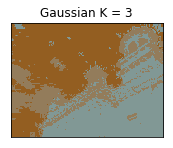

In [25]:
new_clusters1_pos = []
new_clusters2_pos = []
new_clusters3_pos = []
new_clusters1_color = []
new_clusters2_color = []
new_clusters3_color = []

# get the array of image
array = np.array(img)

array_copy = array.copy()

# reshape the image into [RGB] [RGB]
array_copy = array_copy.transpose(0,1,2).reshape(-1,3)

init_cluster_size = int(array_copy.shape[0]/3)

# assign the initial clusters
cluster1 = array_copy[init_cluster_size*0:init_cluster_size*1]
cluster2 = array_copy[init_cluster_size*1:init_cluster_size*2]
cluster3 = array_copy[init_cluster_size*2:init_cluster_size*3]
clusters = [cluster1, cluster2,cluster3]

# calculate the mean of the initial clusters
meanc11 = int(np.mean(cluster1[:,0]))
meanc12 = int(np.mean(cluster1[:,1]))
meanc13 = int(np.mean(cluster1[:,2]))
meanc21 = int(np.mean(cluster2[:,0]))
meanc22 = int(np.mean(cluster2[:,1]))
meanc23 = int(np.mean(cluster2[:,2]))
meanc31 = int(np.mean(cluster3[:,0]))
meanc32 = int(np.mean(cluster3[:,1]))
meanc33 = int(np.mean(cluster3[:,2]))
meanc1 = [meanc11,meanc12,meanc13]
meanc2 = [meanc21,meanc22,meanc23]
meanc3 = [meanc31,meanc32,meanc33]
means=[meanc1,meanc2,meanc3]

# do 10 iterations 
for i in range(0,10):
    covariances = find_variance(clusters, means)
    for row in range(0, height):
            for col in range(0, width):
                color = img[row, col]
                pos=(row,col)
                group_no = find_group(color, means, clusters, covariances)
                # assign points into corresponding groups
                if group_no == 1:
                    new_clusters1_color.append(color)
                    new_clusters1_pos.append(pos)
                elif group_no == 2:
                    new_clusters2_color.append(color)
                    new_clusters2_pos.append(pos)
                else:
                    new_clusters3_color.append(color)
                    new_clusters3_pos.append(pos)
    # get the new clusters and calculate the mean of the clusters
    clusters1 = new_clusters1_color
    clusters2 = new_clusters2_color
    clusters3 = new_clusters3_color
    clusters = [clusters1,clusters2,cluster3]
    meanc11 = int(np.mean(cluster1[:,0]))
    meanc12 = int(np.mean(cluster1[:,1]))
    meanc13 = int(np.mean(cluster1[:,2]))
    meanc21 = int(np.mean(cluster2[:,0]))
    meanc22 = int(np.mean(cluster2[:,1]))
    meanc23 = int(np.mean(cluster2[:,2]))
    meanc31 = int(np.mean(cluster3[:,0]))
    meanc32 = int(np.mean(cluster3[:,1]))
    meanc33 = int(np.mean(cluster3[:,2]))
    meanc1 = [meanc11,meanc12,meanc13]
    meanc2 = [meanc21,meanc22,meanc23]
    meanc3 = [meanc31,meanc32,meanc33]
    means=[meanc1,meanc2,meanc3]
    
# replace the position with correspoding mean of the clusters
for x in range(0, len(new_clusters1_pos)):
    img_copy[new_clusters1_pos[x][0], new_clusters1_pos[x][1]] = means[0]
for x in range(0, len(new_clusters2_pos)):
    img_copy[new_clusters2_pos[x][0], new_clusters2_pos[x][1]] = means[1]
for x in range(0, len(new_clusters3_pos)):
    img_copy[new_clusters3_pos[x][0], new_clusters3_pos[x][1]] = means[2]
plt.subplot(122), plt.imshow(img_copy)
plt.title("Gaussian K = 3"), plt.xticks([]), plt.yticks([])
plt.show()

1.1.3  Under what data distribution conditions would K-means and EM give the
same solution, provided similar initializations?

If the data shows a gaussian distribusion, the K-means and EM should give same results. 